In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

In [3]:
with open('features/both_.pkl', 'rb') as f:
    both_feature = pickle.load(f)
both_feature.dropna(inplace = True)
both_feature.reset_index(inplace = True)
both_feature.drop(both_feature.columns[0], axis=1,inplace = True)
both_feature.drop(labels = both_feature[both_feature.ethnicity.eq('other')].index,inplace =True)

both_feature["ethnicity"].replace({"asian":"asian/hispanic","hispanic":"asian/hispanic"}, inplace=True)

In [4]:
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(both_feature.drop(columns = ['gender','ethnicity']), both_feature['gender'], test_size=0.2, random_state=43)

In [5]:
GBC = GradientBoostingClassifier(n_estimators=300,max_depth = 7).fit(X_train_gender, y_train_gender)

In [7]:
np.set_printoptions(precision=2)

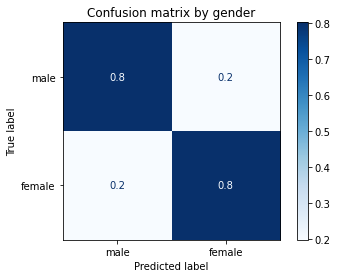

In [31]:
titles_options = [("Confusion matrix by gender", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBC, X_test_gender, y_test_gender,
                                 display_labels=set(y_test_gender.values),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)


plt.savefig('confusion_gender.pdf')

In [21]:
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(both_feature.drop(columns = ['gender','ethnicity']), both_feature['ethnicity'], test_size=0.2, random_state=43)

In [22]:
GBC_eth = GradientBoostingClassifier(n_estimators=300,max_depth = 7).fit(X_train_eth, y_train_eth)

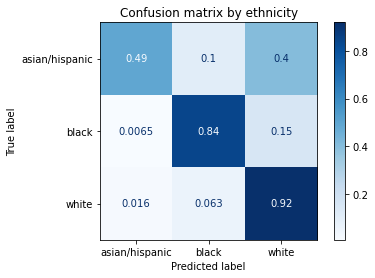

In [32]:
titles_options = [("Confusion matrix by ethnicity", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBC_eth, X_test_eth, y_test_eth,
                                 display_labels=set(y_test_eth.values),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)



plt.savefig('confusion_eth.pdf')